<a href="https://colab.research.google.com/github/FlavioSarto/FlavioSarto/blob/main/Aprofundamento4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Ciência de Dados </b></font></h1> 
<h1 align=left><font size = 5, style="color:rgb(0,0,0)"><b>Paradigmas de Linguagens de
Programação para Ciência de Dados</b></font></h1> 

*Rogério de Oliveira* 

<br>
<br>

---


Este é um material de apoio para Atividade de Aprofundamento 2. Ele mostra como obter e tratar dados do [Gapminder](https://www.gapminder.org/) e do [WID](https://wid.world/). Você pode empregar uma ou ambas as fontes de dados. 

# Gapminder

![imagem](https://www.gapminder.org/wp-content/themes/gapminder2/images/gapminder-logo.svg)

Essa é uma importante fonte de dados aberta que contêm diversas informações e índices relacionados ao desenvolvimento dos países.

Acesse [aqui](https://www.gapminder.org/data/) para extrair os dados. 

Escolha os dados de seu interesse. Faça o download no formato `.csv` para o local que desejar.

In [123]:
import pandas as pd

power = pd.read_csv('https://raw.githubusercontent.com/FlavioSarto/FlavioSarto/main/aprofundamento2/hydro_power_generation_total.csv')
power.head()

,country,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52k,58.5k,70k,73.8k,81.7k,36.8k,36.8k,45.4k,47.7k,51.2k,51.2k,54.3k,49.7k,51.7k,60.3k,60.3k,60.3k,60.3k,61k,62.3k,66.4k,72.2k,76.5k,77k,77.4k,79.5k,75.2k,91.1k,76.9k,78.4k,87.5k,98.3k,107k,151k,191k,229k,215k,270k,266k,304k,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.2k,77.4k,96.9k,112k,138k,163k,189k,206k,232k,254k,262k,269k,275k,236k,183k,349k,288k,253k,265k,245k,303k,277k,285k,324k,362k,492k,432k,423k,454k,395k,306k,302k,420k,470k,462k,467k,240k,327k,448k,652k,NaN
2,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133k,129k,257k,432k,447k,431k,496k,667k,917k,1.3M,1.26M,1.51M,1.58M,1.71M,1.77M,1.81M,1.88M,1.29M,1.11M,1.54M,1.4M,1.67M,2.05M,2.35M,2.31M,1.97M,2.41M,2.27M,1.84M,2.47M,3.18M,3.08M,2.91M,2.62M,2.92M,3.26M,2.61M,2.62M,2.91M,2.89M,NaN
3,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134k,133k,262k,369k,302k,165k,135k,120k,132k,103k,108k,83.2k,143k,170k,172k,153k,157k,159k,155k,174k,220k,NaN
4,Australia,344k,397k,423k,567k,588k,713k,607k,655k,654k,720k,764k,996k,995k,981k,1.14M,1.26M,1.29M,1.13M,1.19M,1.32M,1.11M,1.21M,1.17M,1.04M,1.04M,1.18M,1.25M,1.17M,1.23M,1.24M,1.22M,1.36M,1.32M,1.42M,1.41M,1.37M,1.32M,1.42M,1.32M,1.39M,1.41M,1.42M,1.36M,1.4M,1.38M,1.31M,1.35M,1.23M,1.02M,945k,1.07M,1.27M


# Preparação dos Dados

Vamos obter aqui dados de escolaridade e emissões de co2 do Brasil. O Gapminder fornece esses dados em conjuntos separados e vamos combinar esses dados para nossa análise.

In [124]:
powerF = power[ power.country == 'Australia' ]
powerF

,country,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
4,Australia,344k,397k,423k,567k,588k,713k,607k,655k,654k,720k,764k,996k,995k,981k,1.14M,1.26M,1.29M,1.13M,1.19M,1.32M,1.11M,1.21M,1.17M,1.04M,1.04M,1.18M,1.25M,1.17M,1.23M,1.24M,1.22M,1.36M,1.32M,1.42M,1.41M,1.37M,1.32M,1.42M,1.32M,1.39M,1.41M,1.42M,1.36M,1.4M,1.38M,1.31M,1.35M,1.23M,1.02M,945k,1.07M,1.27M


In [125]:
AU = pd.melt(powerF, id_vars=['country'])
AU.head()

,country,variable,value
0,Australia,1959,344k
1,Australia,1960,397k
2,Australia,1961,423k
3,Australia,1962,567k
4,Australia,1963,588k


In [126]:
AU = AU.rename(columns={'variable':'year','value':'powerg'})
AU.head()

,country,year,powerg
0,Australia,1959,344k
1,Australia,1960,397k
2,Australia,1961,423k
3,Australia,1962,567k
4,Australia,1963,588k


In [127]:
wip = pd.read_csv('https://raw.githubusercontent.com/FlavioSarto/FlavioSarto/main/aprofundamento2/wn_bothhouses_c.csv')
wip = wip[ wip.country == 'Australia' ]
wip

,country,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
8,Australia,NaN,3.6,3.21,2.94,2.73,2.46,2.19,3.29,6.67,0.0,2.72,2.72,2.72,2.72,2.72,2.72,2.72,1.62,0.0,6.67,3.69,2.72,5.0,1.62,0.0,3.33,1.08,0.0,1.6,2.67,3.14,3.17,3.19,4.25,5.3,6.35,7.58,8.82,10.1,9.82,10.4,11.0,11.6,11.9,12.2,12.5,12.7,12.8,13.0,15.5,18.0,20.5,30.3,24.1,25.1,26.0,27.0,27.4,27.9,28.3,28.8,29.2,29.6,29.5,29.4,29.2,30.4,31.4,32.2,31.2,30.3,29.5,31.1,33.4,36.6,37.0


In [128]:
wip = pd.melt(wip, id_vars=['country'])

In [130]:

wip = wip.rename(columns={'variable':'year','value':'wip'})
#inflation_au2=inflation_au[inflation_au.year>'1962']
#inflation_au2=inflation_au2[inflation_au2.year<'2011']

wip.head()

,country,year,wip
0,Australia,1944,NaN
1,Australia,1945,3.60
2,Australia,1946,3.21
3,Australia,1947,2.94
4,Australia,1948,2.73


In [131]:
wip2 = pd.merge(AU,wip,on=['country','year'])
wip2.head()

,country,year,powerg,wip
0,Australia,1959,344k,2.72
1,Australia,1960,397k,2.72
2,Australia,1961,423k,1.62
3,Australia,1962,567k,0.00
4,Australia,1963,588k,6.67


# Visualização e Análise dos Dados

In [132]:
wip2.dtypes

country     object
year        object
powerg      object
wip        float64
dtype: object

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

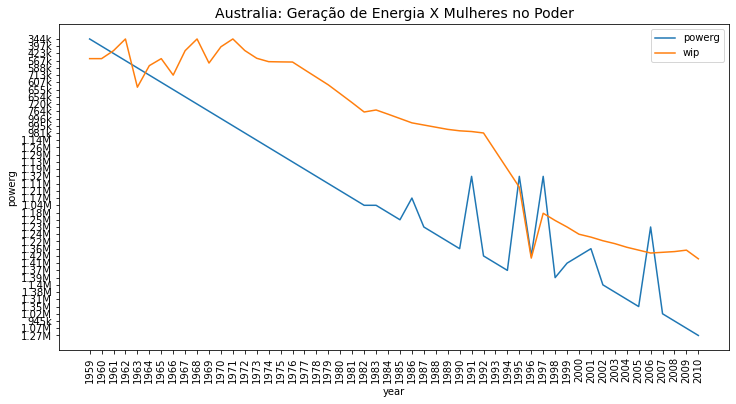

In [136]:
plt.figure(figsize=(12,6))

sns.lineplot(x=wip2.year, y=wip2.powerg, label='powerg')
sns.lineplot(x=wip2.year, y=wip2.wip, label='wip')

plt.title('Australia: Geração de Energia X Mulheres no Poder', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Conclusões

Às análises devem ser finalizadas com uma conclusão, em geral um texto escrito e que inclui os resultados, limitações da análise e sugestões de próximos passos.

> *Os dados acima mostram que a escolaridade, renda e concentração de renda vem crescendo no Brasil de modo bastante correlacionado nas últimas décadas, havendo entretanto um maior aumento de emissões nos últimos anos.*